# Figure 5 Code 

Importing libraries below (numpy, matplotlib, and scipy)

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.ticker as ticker
import matplotlib.image as mpimg
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy import optimize, stats

plt.rcParams["font.family"] = "Serif"
plt.rcParams.update({'font.size': 10, 'font.weight' : 100})

Loading the data, you may need to configure the directory to match where you've downloaded it. I've designed this to run in the same directory as a folder 'Data', which contains all of the data.

In [2]:
# open the file in the write mode
f_dir = 'Data/Figure5data_'
save_name = ['feh', 'mgfe', 'Rform', 'age', 'time', 'sfr', 'main_mass']

data_arr = []
j = 0

for j in range(0, len(save_name)):
    data_arr.append(np.loadtxt(f_dir+str(save_name[j])))
    if(not data_arr):
        print("error: data not loaded properly.")
    if(j == len(save_name)-1):
        print("Successfully loaded all files.")

feh, mgfe, Rform, age, time, sfr, main_mass = data_arr 


Successfully loaded all files.


In [3]:
def mean_line(age, mgfe):
    tform = 13.7987 - age
    agers = [0.25,1.25,2.25,3.25,4.25,5.25,6.25,7.25,8.25,9.25,10.25,11.25,12.25,13.25,14.25]
    means = []
    for i in range(0, len(agers)-1):
        ind = np.where((tform > agers[i]) & (tform < agers[i+1]))
        means.append(np.mean(mgfe[ind]))
    means = np.array(means)
    agers = np.array(agers)
    
    return means, agers

### Main Figure Code

Inset colorbar code necessarily makes the code quite unruly. This should run without any additional tweaks. 

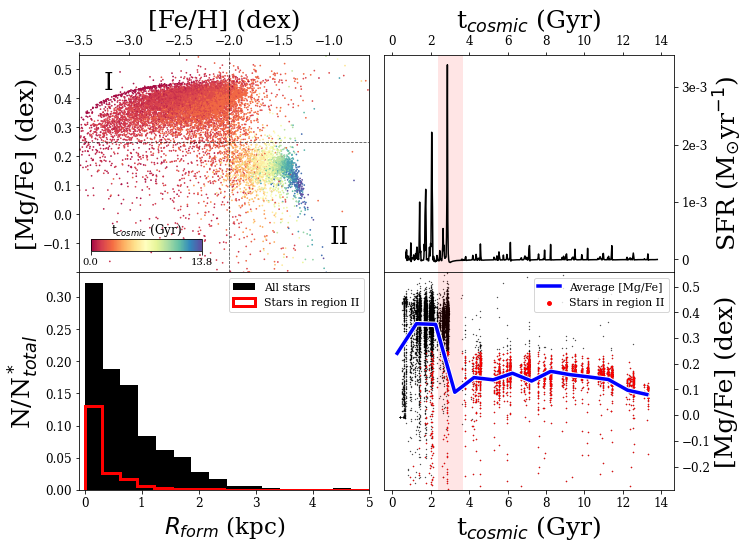

In [4]:
fig = plt.figure(figsize = (10.67,8), frameon = False)

tform = 13.7987-age

sec_ind = np.where( (mgfe <= 0.25) & (feh >= -2))

colors = ['black', 'red', 'blue', 'green']
ranges = [0,1,2,3]


ax1 = fig.add_subplot(2, 2, 1)

############# THE FOLLOWING CODE IS FOR GENERATING AN INSET COLORBAR ############

ind = np.where(Rform < 15)
counts1,xbins1,ybins1,image1 = plt.hist2d(feh[ind], mgfe[ind], bins = [100,100])

#mean age for bins of stars in mgfe vs feh space
mean_age1, xedges1, yedges1, binnumber1 = stats.binned_statistic_2d(feh[ind], mgfe[ind], 
                                                                    age[ind], 'mean', bins= [100,100])

#masks below cuts out where there are fewer stars than a particular threshold
m1 = np.ma.masked_where(counts1 < 1,  mean_age1)
im = ax1.imshow(m1.transpose(), interpolation='nearest', origin='lower', 
                extent=[xedges1[0],xedges1[-1],yedges1[0],yedges1[-1]], cmap = 'Spectral', aspect='auto', vmin=0, vmax=13.8)
ax1.clear()

cbar_ax = fig.add_axes([ 0.14, 0.54, 0.145, 0.02]) #left, bottom, width, height  # vertically oriented colorbar

cb = fig.colorbar(im, cax=cbar_ax, ticks = [0,13.8],  orientation = 'horizontal')
#cb.ax.yaxis.set_ticks_position("right")
#cb.ax.set_yticklabels(['0 Gyr', '13.8 Gyr'], fontweight = 15) # Used to make custom labels on the tick marks themselves
cb.ax.set_title(r"t$_{cosmic}$ (Gyr)")
#cb.ax.yaxis.set_label_position("left")

############# THE ABOVE CODE IS FOR GENERATING AN INSET COLORBAR ############

#ax1.scatter(feh,mgfe-0.0005, s = 0.5, alpha = 0.5, c = 'black')
ax1.scatter(feh,mgfe, s = 0.5, c = tform, cmap = "Spectral")
ax1.set_ylim(-0.2, 0.55)
ax1.axvline(-2, ls = "--", color = 'black', lw = 0.8, alpha = 0.7)
ax1.axhline(0.25, ls = "--", color = 'black', lw = 0.8, alpha = 0.7)

ax1.set_ylabel("[Mg/Fe] (dex)", size = 25)
ax1.set_xlabel("[Fe/H] (dex)", size = 25, labelpad = 7)
ax1.xaxis.set_label_position("top")
ax1.xaxis.tick_top()
ax1.set_xlim(-3.5,-0.6)

ax1.text(-3.25,0.43, "I", size = 24)
ax1.text(-1,-0.1, "II", size = 24)

xticks1 = ax1.xaxis.get_majorticklabels()
yticks1 = ax1.yaxis.get_majorticklabels()
plt.setp(yticks1[0], visible = False)


ax2 = fig.add_subplot(2, 2, 2)

ax2.axvline(3, lw = 25, color = 'r', alpha = 0.1)
ax2.ticklabel_format(useOffset=False, style = 'plain')
ax2.yaxis.set_ticks([0,1e-4,2e-4,3e-4])
ax2.yaxis.set_ticklabels(['0',r'1$\times 10^{-4}$',r'2$\times 10^{-4}$',r'3$\times 10^{-4}$'])
ax2.yaxis.set_ticklabels(['0','1e-3','2e-3','3e-3'])
ax2.plot(time[36:600], sfr, color = 'black')
ax2.set_xlabel(r"t$_{cosmic}$ (Gyr)", size = 25, labelpad = 7)
ax2.xaxis.set_label_position("top")
ax2.xaxis.tick_top()
ax2.set_ylabel(r"SFR (M$_{\odot}$yr$^{-1}$)", size = 25)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

xticks2 = ax2.xaxis.get_majorticklabels()
yticks2 = ax2.yaxis.get_majorticklabels()

weights1 = np.ones_like(Rform)/float(len(Rform))
weights2 = np.ones_like(Rform[sec_ind])/float(len(Rform))

ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(Rform, bins = 470, color = 'black', label = "All stars", weights = weights1)
ax3.hist(Rform[sec_ind], bins = 47, color = 'red', histtype = 'step', weights = weights2,
         lw = 3, label = "Stars in region II")
ax3.legend(fontsize = 11)
ax3.set_ylabel(r"N/N$^*_{total}$", size = 25)
ax3.yaxis.set_label_position("left")
ax3.set_xlim(-0.1,5)

xticks3 = ax3.xaxis.get_majorticklabels()
yticks3 = ax3.yaxis.get_majorticklabels()

ax3.set_xlabel(r"$R_{form}$ (kpc)", size = 23)

means, agers = mean_line(age, mgfe)

ax4 = fig.add_subplot(2, 2, 4, sharex = ax2)
ax4.yaxis.tick_right()
ax4.axvline(3, lw = 25, color = 'r', alpha = 0.1)

ax4.scatter(tform, mgfe, color = 'black', s = 0.1)
ax4.scatter(tform[sec_ind], mgfe[sec_ind], color = 'r', s = 0.2)
ax4.scatter(14,14, color = 'r', s = 15, label = "Stars in region II")
ax4.plot(agers[0:14], means[0:14], color = 'white', lw = 5.5)    
ax4.plot(agers[0:14], means[0:14], color = 'b', lw = 3.5, label = "Average [Mg/Fe]")    


ax4.yaxis.set_label_position("right")
ax4.set_ylabel("[Mg/Fe] (dex)", size = 25)
ax4.set_ylim(-0.29, np.max(mgfe))

ax4.legend(fontsize = 11)

xticks4 = ax4.xaxis.get_majorticklabels()
yticks4 = ax4.yaxis.get_majorticklabels()
ax4.set_xlabel(r"t$_{cosmic}$ (Gyr)", size = 25)

plt.setp([xticks1,xticks2,xticks3,xticks4, yticks1, yticks2, yticks3, yticks4], size = 12)

plt.subplots_adjust(wspace=.05, hspace=.0)

#plt.savefig("Figure5.png", dpi = 150)

plt.show()